# Comparison of Software and Hardware Memory Bandwidth of STREAM

This is the script that generates Fig. 2 of the paper.

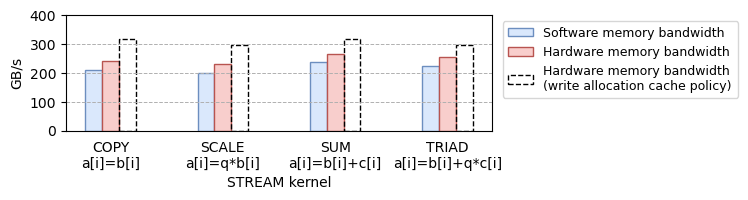

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# The data: from the output of the program
sw_bandwidth = [210299.78, 197566.32, 238588.01, 222579.93]
hw_bandwidth = [240342.56, 230186.44, 264398.08, 254331.14]

group_labels = ['COPY\na[i]=b[i]', 
                'SCALE\na[i]=q*b[i]', 
                'SUM\na[i]=b[i]+c[i]', 
                'TRIAD\na[i]=b[i]+q*c[i]']
est_hw_bandwidth = [
    sw_bandwidth[0] / 2 * 3,
    sw_bandwidth[1] / 2 * 3,
    sw_bandwidth[2] / 3 * 4,
    sw_bandwidth[3] / 3 * 4
]

# Convert from MB to GB (10^9 B = 10^6 KB = 10^3 MB = 1 GB)
sw_bandwidth = [x * 0.001 for x in sw_bandwidth]
hw_bandwidth = [x * 0.001 for x in hw_bandwidth]
est_hw_bandwidth = [x * 0.001 for x in est_hw_bandwidth]

# Draw the bar chart
bar_width = 0.15  # bar width
index = np.arange(len(group_labels))  # indices of the groups

fig, ax = plt.subplots(figsize=(5.5, 1.5))

bar1 = ax.bar(index, sw_bandwidth, bar_width, label='Software memory bandwidth',
              fill=True, edgecolor='#6C8EBF', color='#DAE8FC')
bar2 = ax.bar(index + bar_width, hw_bandwidth, bar_width, label='Hardware memory bandwidth',
              fill=True, edgecolor='#B85450', color='#F8CECC')
bar3 = ax.bar(index + 2 * bar_width, est_hw_bandwidth, bar_width, label='Hardware memory bandwidth \n(write allocation cache policy)',
              fill=False, edgecolor='black', linestyle='--')

ax.set_xlabel('STREAM kernel')
ax.set_ylabel('GB/s')
ax.set_ylim(0, 400)
ax.set_xticks(index + 1 * bar_width)
ax.set_xticklabels(group_labels)
ax.legend(loc=2, bbox_to_anchor=(1.01, 1.0), prop={'size': 9})

# Remove the ticks on the x-axis
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

# Add a dashed horizontal line to each tick of the y-axis
ax.grid(axis='y', linestyle='--', linewidth=0.7)

# Save as a PDF
plt.savefig('sw_hw_bw_stream.pdf', format='pdf', bbox_inches='tight')

plt.show()